In [1]:
import datasets
import albumentations as A
from PIL import Image as PILImage
import matplotlib.pyplot as plt

import os
import cv2
import numpy as np
import pandas as pd
import albumentations
from PIL import Image, ImageOps, ImageEnhance
from albumentations.core.transforms_interface import ImageOnlyTransform
from albumentations.augmentations import functional as F
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset


In [18]:
def display_images(
    images,
    columns=5,
    width=20,
    height=8,
    max_images=15,
    label_wrap_length=50,
    label_font_size=8,
):
    if not images:
        print("No images to display.")
        return

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images = images[0:max_images]

    height = max(height, int(len(images) / columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)


## Hyperparams

In [3]:
IMAGE_SIZE = 224

In [4]:
dataset = datasets.load_dataset("keremberke/pokemon-classification",name="full")

selected_columns = ['image','labels']
train_ds = dataset['train'].select_columns(selected_columns)
val_ds = dataset['validation'].select_columns(selected_columns)
test_ds = dataset['test'].select_columns(selected_columns)


Found cached dataset pokemon-classification (/home/yslee/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
for batch in train_ds:
    print(batch)
    break

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F74A7320DF0>, 'labels': 57}


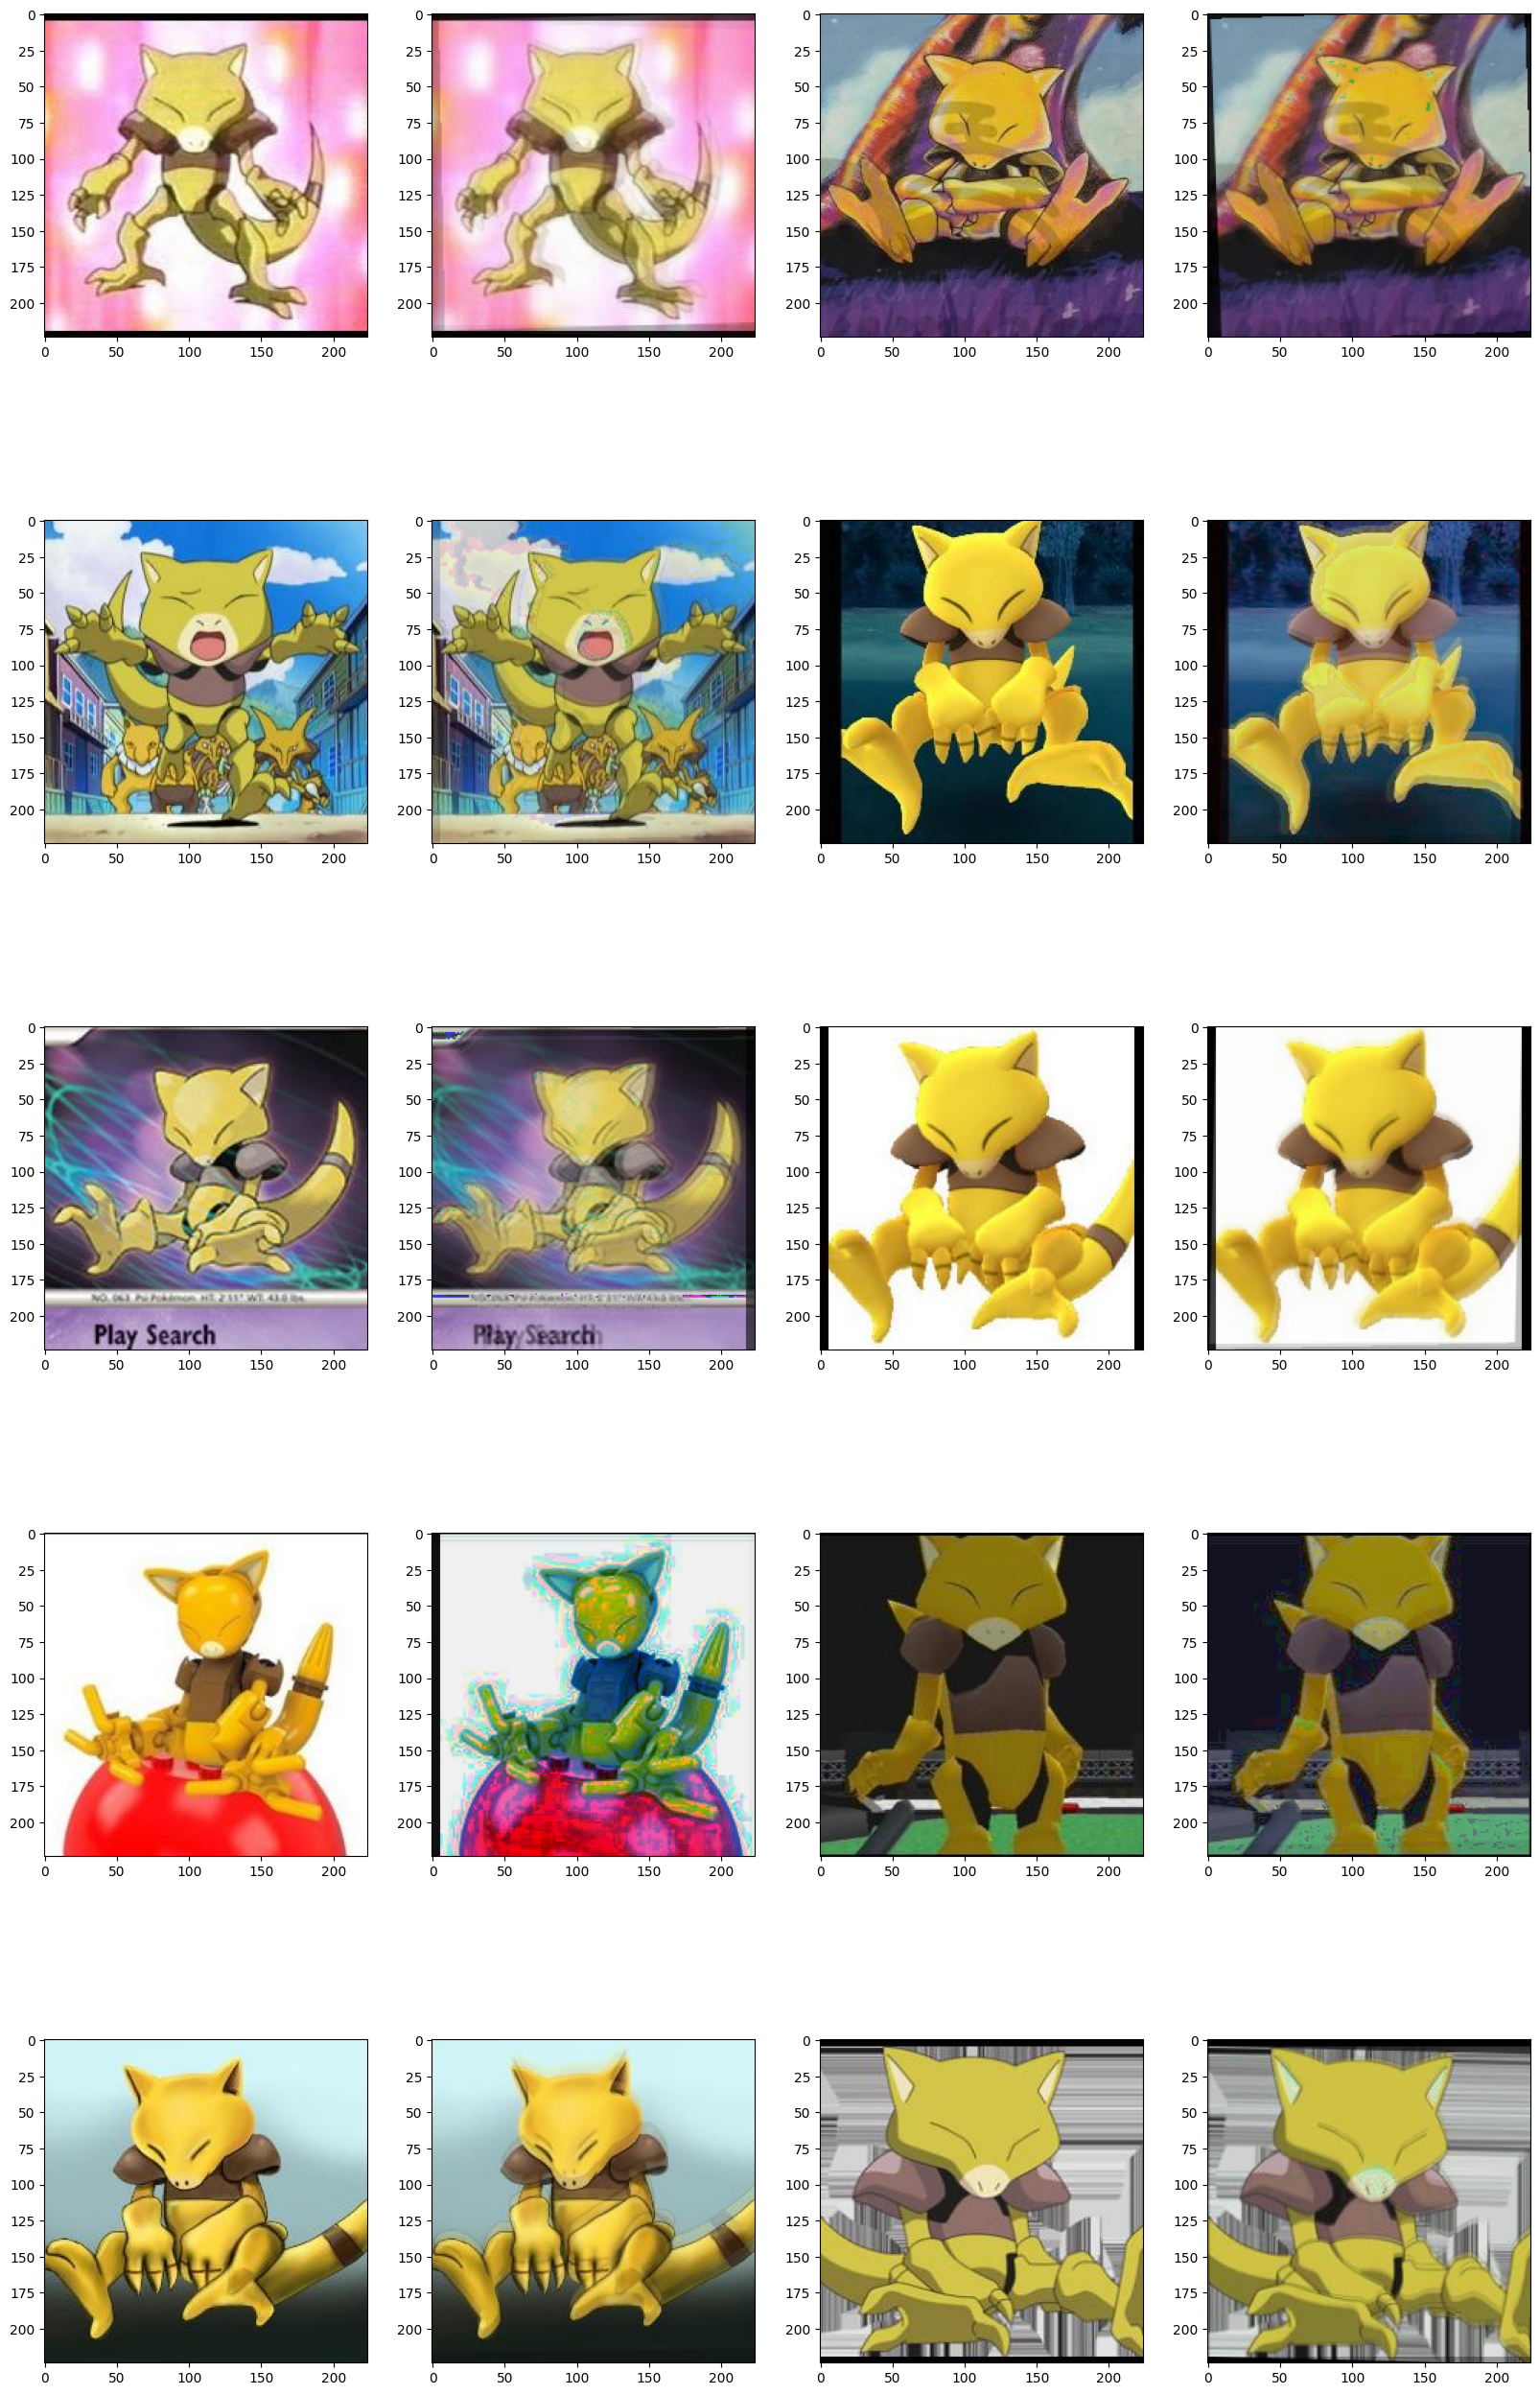

In [32]:
from augmix import RandomAugMix

arg_mix = RandomAugMix()

train_transforms = A.Compose(
    [RandomAugMix(severity=1, width=3, depth=3, alpha=1.0, p=1.0)]
)

images = []
for row in train_ds["image"][:10]:
    image = np.array(row)
    image_ = train_transforms(image=image)["image"].astype(np.float32)
    image_ = (image_ * 1).astype(np.uint8)
    images.append(Image.fromarray(image))
    images.append(Image.fromarray(image_))

display_images(images, columns=4, max_images=len(images))
